In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, mutual_info_classif
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Hiperparametri eksperimenta

In [2]:
# PreviousAdmissionDays
PREV_ADM_DAYS_MEDIAN = 1055

# Height_Discharge
HEIGHT_MEDIAN_MALE = 176
HEIGHT_MEDIAN_FEMALE = 162
HEIGHT_MEDIAN_GENDER_MISSING = 172
HEIGHT_LOWER_LIM = 130
HEIGHT_UPPER_LIM = 204

# Weigth_Discharge
WEIGHT_MEDIAN_MALE = 90
WEIGHT_MEDIAN_FEMALE = 75
WEIGHT_MEDIAN_GENDER_MISSING = 85
WEIGHT_LOWER_LIM = 33
WEIGHT_UPPER_LIM = 199

GRUPE_LJEKOVA = {
  "Antibiotici": [
    "amoxicillin_count",
    "amoxicillin_and_betalactamase_inhibitor_count",
    "ampicillin_count",
    "ampicillin_and_betalactamase_inhibitor_count",
    "azithromycin_count",
    "cefalexin_count",
    "cefazolin_count",
    "cefepime_count",
    "ceftazidime_count",
    "ceftazidime_and_betalactamase_inhibitor_count",
    "ceftriaxone_count",
    "cefuroxime_count",
    "chloramphenicol_count",
    "ciprofloxacin_count",
    "clindamycin_count",
    "colistin_count",
    "erythromycin_count",
    "flucloxacillin_count",
    "gentamicin_count",
    "meropenem_count",
    "metronidazole_count",
    "moxifloxacin_count",
    "vancomycin_count"
  ],
  "Antikoagulanti": [
    "apixaban_count",
    "dabigatran_etexilate_count",
    "enoxaparin_count",
    "fondaparinux_count",
    "warfarin_count"
  ],

  "Antitrombotici": [
    "clopidogrel_count"
   ],

  "Antidijabetici": [
    "acarbose_count",
    "dapagliflozin_count",
    "empagliflozin_count",
    "gliclazide_count",
    "glimepiride_count",
    "insulin_aspart_count",
    "insulin_glargine_count",
    "insulin_human_count",
    "metformin_count",
    "metformin_and_alogliptin_count",
    "metformin_and_empagliflozin_count",
    "metformin_and_vildagliptin_count"
  ],
  "NSAID analgetici": [
    "diclofenac_count",
    "ibuprofen_count",
    "ketoprofen_count",
    "tramadol_and_paracetamol_count"

 ],
  "Opioidni analgetici": [
    "fentanyl_count",
    "morphine_count",
    "tramadol_count",
    "tramadol_and_paracetamol_count"
  ],
 "Antihipertenzivi": [
    "amlodipine_count",
    "diltiazem_count",
    "doxazosin_count",
    "losartan_count",
    "losartan_and_diuretics_count"
  ],
  "Beta blokatori": [
    "atenolol_count",
    "bisoprolol_count",
    "carvedilol_count",
    "metoprolol_count",
    "nebivolol_count"
  ],

 "ACE inhibitori": [
    "lisinopril_count",
    "perindopril_count",
    "ramipril_count"
 ],
  "Diuretici": [
    "furosemide_count",
    "spironolactone_count",
    "torasemide_count"
 ],
  "Statini": [
    "atorvastatin_count",
    "rosuvastatin_count"

  ],
  "Antipsihotici": [
    "haloperidol_count",
    "quetiapine_count",
    "risperidone_count"
  ],
  "Antiepileptici": [
    "carbamazepine_count",
    "lamotrigine_count",
    "levetiracetam_count",
    "valproic_acid_count" 
 ], 
  "Sedativi i anksiolitici": [
    "alprazolam_count",
    "bromazepam_count",
    "diazepam_count",
    "lorazepam_count",
    "midazolam_count",
    "zolpidem_count"
  ],
  "Antigiht": [
    "allopurinol_count",
    "colchicine_count"
 ],

  "Proton pump inhibitors": [
   "esomeprazole_count", 
   "pantoprazole_count"
 
  ],
  "Antihistaminici": [
    "loratadine_count"
  ],
  "Antiasmatici": [
    "aminophylline_count",
    "ipratropium_bromide_count",
    "salbutamol_count",
    "salbutamol_and_ipratropium_bromide_count"
  ],
  "Antiviralni": [
    "aciclovir_count",
    "oseltamivir_count"
  ],
  "Vitamini i Suplementi": [
    "colecalciferol_count"
  ],
  "Antiemetici": [
    "ondansetron_count"
 ],

 "Thyroid therapy": [
    "levothyroxine_sodium_count"
 
  ],
  "Antifungalni": [
    "fluconazole_count",
    "miconazole_count",
    "clotrimazole_count"
  ],
  "Antihipertenzivi": [
    "amlodipine_count",
    "doxazosin_count",
    "losartan_count",
    "losartan_and_diuretics_count"

  ],
  "Imunosupresivi": [
    "dexamethasone_count"
  ],
  "Kortikosteroidi": [
    "dexamethasone_count"
 ]
 
}


In [ ]:
# Laurini ljekovi koji se ne pojavljuju u nasem datasetu
not_appearing = []
all_laura_ljek = []
for k, v in GRUPE_LJEKOVA.items():
    for ljek in v: 
        all_laura_ljek.append(ljek)
        if ljek not in all.columns: 
            not_appearing.append(ljek)
not_appearing

['doxycycline_count',
 'acetaminophen_count',
 'hydrochlorothiazide_count',
 'azathioprine_count'] -> ovi ljekovi iz laurinog .txt filea se ne pojavljuju u skupu podataka pa sam ih maknuo iz gornjeg dicta

In [ ]:
# Kolone iz naseg dataseta koje se ne pojavljuju u laurinim ljekovima
for l in all.columns[16:]:
    if l not in all_laura_ljek:
        print(l)

# Funkcije za ispravljanje dataset-a

In [4]:
df = pd.read_csv('../data/train.csv', index_col=0)
df_test = pd.read_csv('../data/test.csv', index_col=0)
all = pd.concat([df, df_test])

In [5]:
age_groups_sorted = sorted(list(all.Age_Group.unique()))
age_group_numeric_mapping = {ag: i for i, ag in enumerate(age_groups_sorted)}
age_group_numeric_mapping

{'18-22': 0,
 '23-27': 1,
 '28-32': 2,
 '33-37': 3,
 '38-42': 4,
 '43-47': 5,
 '48-52': 6,
 '53-57': 7,
 '58-62': 8,
 '63-67': 9,
 '68-72': 10,
 '73-77': 11,
 '78-82': 12,
 '83-87': 13,
 '88-92': 14,
 '93-97': 15}

In [6]:
def fix_PreviousAdmissionDays(df):
    df['PrevAdmDaysAvail'] = (df.PreviousAdmissionDays > 0) * 1.0 # Valuable information for prediction
    df.loc[df.PreviousAdmissionDays == -8, 'PreviousAdmissionDays'] = PREV_ADM_DAYS_MEDIAN
    return df

def fix_Weigth_Discharge(df):
    gender_w_medians = {
        'Ž': WEIGHT_MEDIAN_FEMALE,
        'M': WEIGHT_MEDIAN_MALE,
        None: WEIGHT_MEDIAN_GENDER_MISSING
    }
    row_indexer = (df.Weight_Discharge < WEIGHT_LOWER_LIM) | (df.Weight_Discharge > WEIGHT_UPPER_LIM)
    df.loc[row_indexer, 'Weight_Discharge'] = df[row_indexer].Gender.map(gender_w_medians)
    return df

def fix_Heigth_Discharge(df):
    gender_h_medians = {
        'Ž': HEIGHT_MEDIAN_FEMALE,
        'M': HEIGHT_MEDIAN_MALE,
        None: HEIGHT_MEDIAN_GENDER_MISSING
    }
    row_indexer = (df.Height_Discharge < HEIGHT_LOWER_LIM) | (df.Height_Discharge > HEIGHT_UPPER_LIM)
    df.loc[row_indexer, 'Height_Discharge'] = df[row_indexer].Gender.map(gender_h_medians)
    return df

def aggregate_mediactions(df):
    to_drop = []
    for med_group, list_of_meds in GRUPE_LJEKOVA.items():
        df[f"{med_group}_count"] = df[list_of_meds].sum(axis=1)
        to_drop.extend(list_of_meds)
    df.drop(columns=to_drop, inplace=True)
    return df

def convert_age_groups_to_numeric(df):
    df['Age_Group'] = df.Age_Group.map(age_group_numeric_mapping)
    return df

def fix_dataset(df):
    df = fix_PreviousAdmissionDays(df)
    df = fix_Weigth_Discharge(df)
    df = fix_Heigth_Discharge(df)
    df = aggregate_mediactions(df)
    df = convert_age_groups_to_numeric(df)
    return df
    

In [7]:
all = fix_dataset(all)

In [8]:
all.shape

(35923, 206)

In [9]:
all.head()

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acetylsalicylic_acid_count,albumin_count,alprostadil_count,amiodarone_count,atropine_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,butylscopolamine_count,calcium_chloride_count,carbohydrates_count,chlorhexidine_count,chloropyramine_count,clonazepam_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,combinations_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diltiazem_count,dobutamine_count,electrolytes_count,epinephrine_count,eplerenone_count,escitalopram_count,etomidate_count,exemestane_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flumazenil_count,folic_acid_count,fosfomycin_count,gliquidone_count,glyceryl_trinitrate_count,heparin_count,hydrocortisone_count,indapamide_count,indometacin_count,iodixanol_count,iohexol_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,lacidipine_count,lactulose_count,lercanidipine_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,lidocaine_count,linagliptin_count,linezolid_count,loperamide_count,macrogol_combinations_count,mannitol_count,memantine_count,mesalazine_count,metamizole_sodium_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,mirtazapine_count,mometasone_count,montelukast_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,organoheparinoid_count,oxazepam_count,paracetamol_count,paroxetine_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,rabeprazole_count,ramipril_and_amlodipine_count,ramipril_and_diuretics_count,ranitidine_count,ranolazine_count,repaglinide_count,rifampicin_count,rivaroxaban_count,rocuronium_bromide_count,rosuvastatin_and_ezetimibe_count,salmeterol_count,salmeterol_and_fluticasone_count,sertraline_count,sevoflurane_count,silver_sulfadiazine_count,sitagliptin_count,sotalol_count,sufentanil_count,sulfamethoxazole_and_trimethoprim_count,sulpiride_count,tamsulosin_count,tamsulosin_and_dutasteride_count,theophylline_count,thiamazole_count,thiethylperazine_count,thiopental_count,tianeptine_count,ticagrelor_count,tiotropium_bromide_count,tobramycin_count,trandolapril_count,tranexamic_acid_count,trimetazidine_count,trospium_count,urapidil_count,valsartan_count,valsartan_amlodipine_and_hydrochlorothiazide_count,valsartan_and_sacubitril_count,venlafaxine_count,verapamil_count,x99nijenavedenowho_count,zofenopril_count,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Q,R,S,T,U,Y,Z,Probability_0,Probability_1,PrevAdmDaysAvail,Antibiotici_count,Antikoagulanti_count,Antitrombotici_count,Antidijabetici_count,NSAID analgetici_count,Opioidni analgetici_count,Antihipertenzivi_count,Beta blokatori_count,ACE inhibitori_count,Diuretici_count,Statini_count,Antipsihotici_count,Antiepileptici_count,Sedativi i anksiolitici_count,Antigiht_count,Proton pump inhibitors_count,Antihistaminici_count,Antiasmatici_count,Antiviralni_count,Vitamini i Suplementi_count,Antiemetici_count,Thyroid therapy_count,Antifungalni_count,Imunosupresivi_count,Kortikosteroidi_count
1,I,Elektivni,1055,1,13,Ž,0,0,3010100,I,KUĆI,53.0,156.0,ZAVRŠENA OSNOVNA ŠKOLA,DOMAĆICA,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [10]:
all.isna().sum()[all.isna().sum() > 0]

AdmissionDx              498
Gender                     2
Education                280
Current_Work_Status       50
Label                   7336
Probability_0          35923
Probability_1          35923
dtype: int64

Counts of missing values

# OneHot encoding and Scaling functions

In [11]:
def oneHot_encode_feature(df, feature):
    ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
    ohe.fit(df[df[feature].notnull()][[feature]])
    X = ohe.transform(df[[feature]])
    df[ohe.get_feature_names_out()] = X.toarray()
    df.drop(columns=[feature], inplace=True)
    return df

def scale_numeric_features(df, numeric_cols):
    scaler = StandardScaler()
    scaler.fit(df[numeric_cols])
    df[numeric_cols] = scaler.transform(df[numeric_cols])
    return df

def encode_and_scale_features(df, enc_features, scale_features):
    for f in enc_features:
        df = oneHot_encode_feature(df, f)

    df = scale_numeric_features(df, scale_features)
    return df

# Obtaining Preprocessed dataset

In [12]:
cols_to_onehot_encode = [
    'AdmissionDx',
    'AdmissionType',
    'Gender',
    'Discharge_Specialty',
    'Dx_Discharge',
    'Discharge_Status',
    'Education',
    'Current_Work_Status'
]

cols_to_scale= [
    'PreviousAdmissionDays',
    'LOS',
    'Age_Group',
    'Surgery_Count',
    'LOS_ICU',
    'Weight_Discharge',
    'Height_Discharge'
]

In [13]:
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_test = pd.read_csv('../data/test.csv', index_col=0)
df_train['Train'] = 1
df_test['Train'] = 0
all = pd.concat([df_train, df_test])

In [14]:
all = fix_dataset(all)
all = encode_and_scale_features(
    all,
    enc_features=cols_to_onehot_encode,
    scale_features=cols_to_scale
)

/Users/klabs/miniconda3/envs/kotaopy312/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/klabs/miniconda3/envs/kotaopy312/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/klabs/miniconda3/envs/kotaopy312/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/klabs/miniconda3/envs/kotaopy312/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.wa

In [15]:
all.head()

,PreviousAdmissionDays,LOS,Age_Group,Surgery_Count,LOS_ICU,Weight_Discharge,Height_Discharge,Label,acetylsalicylic_acid_count,albumin_count,alprostadil_count,amiodarone_count,atropine_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,butylscopolamine_count,calcium_chloride_count,carbohydrates_count,chlorhexidine_count,chloropyramine_count,clonazepam_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,combinations_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diltiazem_count,dobutamine_count,electrolytes_count,epinephrine_count,eplerenone_count,escitalopram_count,etomidate_count,exemestane_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flumazenil_count,folic_acid_count,fosfomycin_count,gliquidone_count,glyceryl_trinitrate_count,heparin_count,hydrocortisone_count,indapamide_count,indometacin_count,iodixanol_count,iohexol_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,lacidipine_count,lactulose_count,lercanidipine_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,lidocaine_count,linagliptin_count,linezolid_count,loperamide_count,macrogol_combinations_count,mannitol_count,memantine_count,mesalazine_count,metamizole_sodium_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,mirtazapine_count,mometasone_count,montelukast_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,organoheparinoid_count,oxazepam_count,paracetamol_count,paroxetine_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,rabeprazole_count,ramipril_and_amlodipine_count,ramipril_and_diuretics_count,ranitidine_count,ranolazine_count,repaglinide_count,rifampicin_count,rivaroxaban_count,rocuronium_bromide_count,rosuvastatin_and_ezetimibe_count,salmeterol_count,salmeterol_and_fluticasone_count,sertraline_count,sevoflurane_count,silver_sulfadiazine_count,sitagliptin_count,sotalol_count,sufentanil_count,sulfamethoxazole_and_trimethoprim_count,sulpiride_count,tamsulosin_count,tamsulosin_and_dutasteride_count,theophylline_count,thiamazole_count,thiethylperazine_count,thiopental_count,tianeptine_count,ticagrelor_count,tiotropium_bromide_count,tobramycin_count,trandolapril_count,tranexamic_acid_count,trimetazidine_count,trospium_count,urapidil_count,valsartan_count,valsartan_amlodipine_and_hydrochlorothiazide_count,valsartan_and_sacubitril_count,venlafaxine_count,verapamil_count,x99nijenavedenowho_count,zofenopril_count,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Q,R,S,T,U,Y,Z,Train,Probability_0,Probability_1,PrevAdmDaysAvail,Antibiotici_count,Antikoagulanti_count,Antitrombotici_count,Antidijabetici_count,NSAID analgetici_count,Opioidni analgetici_count,Antihipertenzivi_count,Beta blokatori_count,ACE inhibitori_count,Diuretici_count,Statini_count,Antipsihotici_count,Antiepileptici_count,Sedativi i anksiolitici_count,Antigiht_count,Proton pump inhibitors_count,Antihistaminici_count,Antiasmatici_count,Antiviralni_count,Vitamini i Suplementi_count,Antiemetici_count,Thyroid therapy_count,Antifungalni_count,Imunosupresivi_count,Kortikosteroidi_count,AdmissionDx_B,AdmissionDx_C,AdmissionDx_D,AdmissionDx_E,AdmissionDx_F,AdmissionDx_G,AdmissionDx_H,AdmissionDx_I,AdmissionDx_J,AdmissionDx_K,AdmissionDx_L,AdmissionDx_M,AdmissionDx_N,AdmissionDx_Q,AdmissionDx_R,AdmissionDx_S,AdmissionDx_T,AdmissionDx_Y,Admissio

In [16]:
df_train = all[all.Train == 1].copy()
df_test = all[all.Train == 0].copy()
df_train.drop(columns=['Train'], inplace=True)
df_train.drop(columns=['Probability_0'], inplace=True)
df_train.drop(columns=['Probability_1'], inplace=True)
df_test.drop(columns=['Train'], inplace=True)
df_test.drop(columns=['Probability_0'], inplace=True)
df_test.drop(columns=['Probability_1'], inplace=True)
df_test.drop(columns=['Label'], inplace=True)

In [17]:
df_train.shape

(28587, 257)

In [18]:
df_test.shape

(7336, 256)

In [19]:
feature_cols = list(df_train.columns)
feature_cols.remove('Label')

In [20]:
X_train = df_train[feature_cols].values
y_train = df_train['Label'].values
X_test = df_test[feature_cols].values

X_train, y_train, i X_test su numpy matrice spremne za treniranje modela.

# Feature Selection

## Lasso

In [21]:
print(X_train.shape)

(28587, 256)


In [80]:
# Set the regularization parameter C=1
logistic = LogisticRegression(C=0.6, penalty='l1', class_weight='balanced', solver='liblinear', random_state=42).fit(X_train, y_train)
f_selector = SelectFromModel(logistic, prefit=True, threshold=1e-3)

X_train_new = f_selector.transform(X_train)
print(X_train_new.shape)

(28587, 202)


In [81]:
l1_coefs = pd.DataFrame({'feature': feature_cols, 'L1_coef': logistic.coef_[0]})

In [82]:
len(l1_coefs[l1_coefs.L1_coef.abs() < 1e-3])

54

In [83]:
l1_coefs[l1_coefs.L1_coef.abs() < 1e-3]

,feature,L1_coef
9,alprostadil_count,0.0
12,b03aa07_count,0.0
13,benzathine_benzylpenicillin_count,0.0
15,butylscopolamine_count,0.0
20,clonazepam_count,0.0
24,dexamethasone_and_antiinfectives_count,0.0
25,dexmedetomidine_count,0.0
26,diltiazem_count,0.0
33,exemestane_count,0.0
35,ferrous_fumarate_count,0.0


In [84]:
l1_coefs[l1_coefs.L1_coef.abs() > 1e-3]

,feature,L1_coef
0,PreviousAdmissionDays,-0.005207
1,LOS,0.067243
2,Age_Group,0.047630
3,Surgery_Count,-0.299877
4,LOS_ICU,0.001049
5,Weight_Discharge,-0.022540
6,Height_Discharge,0.130617
7,acetylsalicylic_acid_count,0.200447
8,albumin_count,-0.265704
10,amiodarone_count,0.001105


In [85]:
df_train['Label'] = y_train

In [86]:
df_train.dobutamine_count.value_counts()

dobutamine_count
0    26105
1     2482
Name: count, dtype: int64

In [87]:
df_train[['dobutamine_count', 'Label']].groupby('dobutamine_count').value_counts()

dobutamine_count  Label
0                 0.0      24364
                  1.0       1741
1                 0.0       2333
                  1.0        149
Name: count, dtype: int64

In [88]:
matthews_corrcoef(y_train, logistic.predict(X_train))

0.2934977993777775

In [89]:
logistic.predict(X_train).mean()

0.36478119424913424

L1 feature selection doesn't seem to make sense in our case. We will see when we have all the medication groupations.

## Variance filter methods

In [91]:
v_threshold = VarianceThreshold(threshold=0.001)
v_threshold.fit(X_train)
meets_var_thresholds = pd.DataFrame({'feature': feature_cols, 'passes_var': v_threshold.get_support()})

In [92]:
meets_var_thresholds.passes_var.mean()

0.7421875

In [93]:
meets_var_thresholds[~meets_var_thresholds.passes_var]

,feature,passes_var
9,alprostadil_count,False
12,b03aa07_count,False
13,benzathine_benzylpenicillin_count,False
14,betamethasone_count,False
15,butylscopolamine_count,False
20,clonazepam_count,False
22,coagulation_factor_viia_count,False
25,dexmedetomidine_count,False
26,diltiazem_count,False
31,escitalopram_count,False


In [94]:
df_test.sitagliptin_count.value_counts()

sitagliptin_count
0    7304
1      32
Name: count, dtype: int64

In [97]:
df_train[['sitagliptin_count', 'Label']].groupby('sitagliptin_count').value_counts(normalize=True)

sitagliptin_count  Label
0                  0.0      0.933856
                   1.0      0.066144
1                  0.0      1.000000
Name: proportion, dtype: float64

## Information Gain

In [ ]:
importances = mutual_info_classif(X_train, y_train)

In [100]:
mutual_info = pd.DataFrame({'feature': feature_cols, 'IG': importances})

<Axes: >

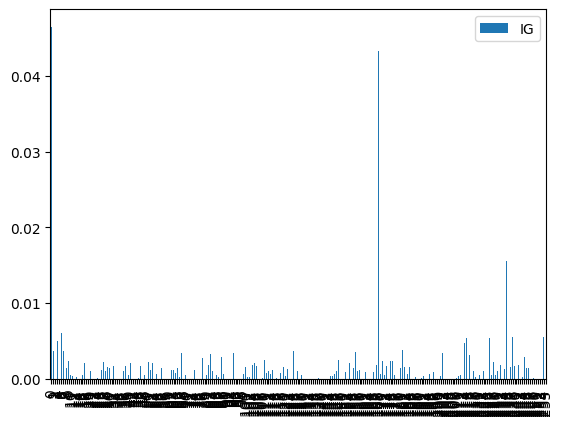

In [102]:
mutual_info.plot(kind='bar')

In [107]:
mutual_info[mutual_info.IG > 0.001]

,feature,IG
0,PreviousAdmissionDays,0.046490
1,LOS,0.003586
3,Surgery_Count,0.005007
5,Weight_Discharge,0.006059
6,Height_Discharge,0.003663
8,albumin_count,0.001347
9,alprostadil_count,0.002354
17,carbohydrates_count,0.002099
20,clonazepam_count,0.001004
26,diltiazem_count,0.001121


In [108]:
df_train[['A', 'Label']].groupby('A').value_counts(normalize=True)

A  Label
0  0.0      0.933817
   1.0      0.066183
1  0.0      0.977273
   1.0      0.022727
2  0.0      1.000000
Name: proportion, dtype: float64

In [110]:
df_train[['A', 'Label']].groupby('A').value_counts()

A  Label
0  0.0      26653
   1.0       1889
1  0.0         43
   1.0          1
2  0.0          1
Name: count, dtype: int64

## Wrapper methods

In [118]:
clf = RandomForestClassifier(n_estimators=200, min_samples_split=9, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=9, n_estimators=200, random_state=42)

In [119]:
y_pred = clf.predict(X_train)

In [120]:
matthews_corrcoef(y_train, y_pred)

0.5759821252389372

In [121]:
(y_pred == y_train).mean()

0.956833525728478

In [122]:
y_pred.mean()

0.02294749361597929

Text(50.722222222222214, 0.5, 'True Label')

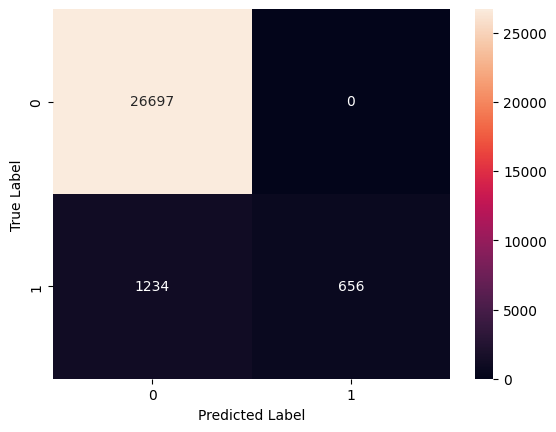

In [124]:
cfm=confusion_matrix(y_train, y_pred)
ax = sns.heatmap(cfm, annot=True, fmt='d')

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [32]:
clf = RandomForestClassifier(n_estimators=2000, min_samples_split=40, class_weight='balanced', oob_score=matthews_corrcoef, random_state=42)
clf.fit(X2_train, y2_train)
clf.oob_score_

0.32754470543190517

In [33]:
y2_pred = clf.predict(X2_test)

In [34]:
matthews_corrcoef(y2_test, y2_pred)

0.29293800179222096

In [170]:
y2_pred.mean()

0.09571761712953149

Text(50.722222222222214, 0.5, 'True Label')

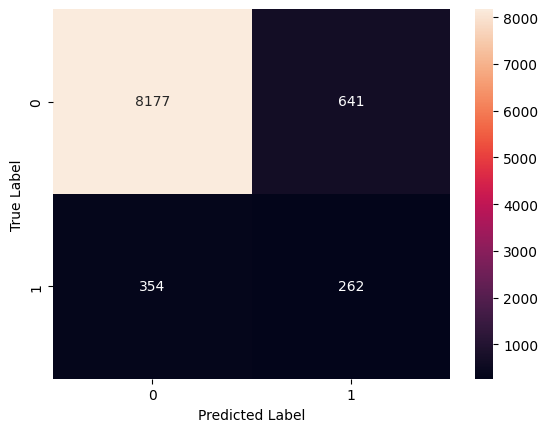

In [171]:
cfm=confusion_matrix(y2_test, y2_pred)
ax = sns.heatmap(cfm, annot=True, fmt='d')

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

In [ ]:
estimator = RandomForestClassifier(n_estimators=3000, random_state=42)
sfs = SequentialFeatureSelector(, tol=-0.01, direction="backward")

In [26]:
# MCC score if we just predict based on whether prev admission days was -8 or not
matthews_corrcoef(y_train, df_train.PrevAdmDaysAvail == 0)

0.2588854238759656